# pre-trained model 그대로 사용

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, InceptionV3, MobileNet, MobileNetV2

# MobileNet 사전학습모델 구축
## MobileNet 사전학습모델을 그대로 사용할 경우 input_shape=(224,224,3)

In [2]:
mobilenet_model = MobileNet(weights='imagenet', include_top=True, input_shape=(224,224,3))

mobilenet_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

# MobileNetV2 사전학습모델 구축
## MobileNetV2 사전학습모델을 드대로 사용할 경우 input_shape=(224,224,3)

In [3]:
mobilenetv2_model = MobileNetV2(weights='imagenet', include_top=True, input_shape=(224,224,3))

mobilenetv2_model.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

# Xception 사전학습모델 구축
## Xception 사전학습모델을 드대로 사용할 경우 input_shape=(299,299,3)

In [4]:
xception_model = Xception(weights='imagenet', include_top=True, input_shape=(299,299,3))

xception_model.summary()

91884032/91884032 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

# InceptionV3 사전학습모델 구축
## InceptionV3 사전학습모델을 그대로 사용할 경우 input_shape=(299,299,3)

In [5]:
inceptionv3_model = InceptionV3(weights='imagenet', include_top=True, input_shape=(299,299,3))

inceptionv3_model.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 rmalization)         

# 테스트 이미지 리스트  가져오기

In [6]:
import zipfile
with zipfile.ZipFile('/content/test_image_dir.zip') as target_file:

    target_file.extractall('/content/test_image_dir/')

In [7]:
import glob

# 테스트 이미지 가져오기

test_image_list = glob.glob('/content/test_image_dir/*.jpg')

print('total image # => ', len(test_image_list))
print(test_image_list)

total image # =>  8
['/content/test_image_dir/b4.jpg', '/content/test_image_dir/b8.jpg', '/content/test_image_dir/b1.jpg', '/content/test_image_dir/b2.jpg', '/content/test_image_dir/b3.jpg', '/content/test_image_dir/b5.jpg', '/content/test_image_dir/b7.jpg', '/content/test_image_dir/b6.jpg']


# OpenCV 이용하여 테스트 이미지 로드 및 사이즈 변경

In [8]:
import cv2

dst_img_list_224 = []
dst_img_list_299 = []
label_str_list = []

for i in range(len(test_image_list)):

    src_img = cv2.imread(test_image_list[i], cv2.IMREAD_COLOR)

    dst_img_224 = cv2.resize(src_img, dsize=(224, 224))  # MobileNet, MobileNetV2
    dst_img_299 = cv2.resize(src_img, dsize=(299, 299))  # InceptionV3, Xception

    dst_img_224 = cv2.cvtColor(dst_img_224, cv2.COLOR_BGR2RGB)
    dst_img_299 = cv2.cvtColor(dst_img_299, cv2.COLOR_BGR2RGB)

    dst_img_224 = dst_img_224 / 255.0
    dst_img_299 = dst_img_299 / 255.0

    label_str = test_image_list[i].split('/')[-1].split('.')[0].strip()  # 이미지 정답 추출

    dst_img_list_224.append(dst_img_224)
    dst_img_list_299.append(dst_img_299)

    label_str_list.append(label_str)    # 이미지 정답 저장

# 테스트 이미지 출력

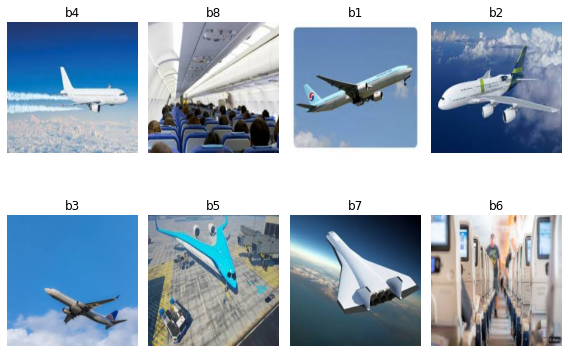

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i in range(len(dst_img_list_224)):

    plt.subplot(2,4,i+1)
    plt.axis('off')

    plt.title(label_str_list[i])

    plt.imshow(dst_img_list_224[i])

plt.tight_layout()
plt.show()

# predict() 실행을 위한 4차원 텐서 변환

In [10]:
import numpy as np

dst_img_array_224 = np.array(dst_img_list_224)
dst_img_array_299 = np.array(dst_img_list_299)

print(dst_img_array_224.shape, dst_img_array_299.shape)

(8, 224, 224, 3) (8, 299, 299, 3)


# 각각의 사전학습 모델을 이용한 predict() 실행

In [11]:
mobilenet_pred = mobilenet_model.predict(dst_img_array_224)  # MobileNet prediction

mobilenetv2_pred = mobilenetv2_model.predict(dst_img_array_224)  # MobileNetV2 prediction

inceptionv3_pred = inceptionv3_model.predict(dst_img_array_299)  # InceptionV3 prediction

xception_pred = xception_model.predict(dst_img_array_299)        # Xception prediction

print(mobilenet_pred.shape)
print(mobilenetv2_pred.shape)
print(inceptionv3_pred.shape)
print(xception_pred.shape)

1/1 [==============================] - 4s 4s/step
(8, 1000)
(8, 1000)
(8, 1000)
(8, 1000)


# decode_predictions() 실행을 통해 top3 확인

In [12]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions


mobilenet_prediction = decode_predictions(mobilenet_pred, top=3)  # MobileNet

mobilenetv2_prediction = decode_predictions(mobilenetv2_pred, top=3)  # MobileNetV2

xception_prediction = decode_predictions(xception_pred, top=3)  # Xception

inceptionv3_prediction = decode_predictions(inceptionv3_pred, top=3)  # InceptionV3

35363/35363 [==============================] - 0s 0us/step


In [13]:
print(type(mobilenet_prediction))
print(type(mobilenetv2_prediction))
print(type(xception_prediction))
print(type(inceptionv3_prediction))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


# MobileNet 사전학습 모델 예측 결과 확인

In [14]:
print('MobileNet Prediction Result')

for i in range(len(mobilenet_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(mobilenet_prediction[i])
    print('===============================')

MobileNet Prediction Result
label= b4
[('n02690373', 'airliner', 0.9699938), ('n04266014', 'space_shuttle', 0.02030523), ('n04592741', 'wing', 0.0038321526)]
label= b8
[('n02917067', 'bullet_train', 0.2988858), ('n02690373', 'airliner', 0.24325559), ('n04612504', 'yawl', 0.10425222)]
label= b1
[('n02690373', 'airliner', 0.98291814), ('n04266014', 'space_shuttle', 0.008180929), ('n04592741', 'wing', 0.005872497)]
label= b2
[('n02690373', 'airliner', 0.8456594), ('n04266014', 'space_shuttle', 0.08577343), ('n03773504', 'missile', 0.021525828)]
label= b3
[('n02690373', 'airliner', 0.8469151), ('n04266014', 'space_shuttle', 0.11556461), ('n04552348', 'warplane', 0.016942479)]
label= b5
[('n03485794', 'handkerchief', 0.34306788), ('n02981792', 'catamaran', 0.16269162), ('n02690373', 'airliner', 0.0576631)]
label= b7
[('n04008634', 'projectile', 0.18164043), ('n04266014', 'space_shuttle', 0.13077068), ('n03498962', 'hatchet', 0.1135994)]
label= b6
[('n03895866', 'passenger_car', 0.46099707),

# MobileNetV2 사전학습 모델 예측 결과 확인

In [15]:
print('MobileNetV2 Prediction Result')

for i in range(len(mobilenetv2_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(mobilenetv2_prediction[i])
    print('===============================')

MobileNetV2 Prediction Result
label= b4
[('n02690373', 'airliner', 0.6778024), ('n02692877', 'airship', 0.06741977), ('n04592741', 'wing', 0.016689662)]
label= b8
[('n02917067', 'bullet_train', 0.35553837), ('n04418357', 'theater_curtain', 0.09260679), ('n04523525', 'vault', 0.06709713)]
label= b1
[('n02690373', 'airliner', 0.85726786), ('n04266014', 'space_shuttle', 0.014713321), ('n04592741', 'wing', 0.012430394)]
label= b2
[('n02690373', 'airliner', 0.84956694), ('n02692877', 'airship', 0.04947419), ('n04592741', 'wing', 0.00985873)]
label= b3
[('n02690373', 'airliner', 0.7908204), ('n04552348', 'warplane', 0.0424604), ('n04592741', 'wing', 0.020611003)]
label= b5
[('n09428293', 'seashore', 0.085343406), ('n02690373', 'airliner', 0.07888659), ('n04355338', 'sundial', 0.04374404)]
label= b7
[('n04592741', 'wing', 0.38186875), ('n04552348', 'warplane', 0.08787044), ('n04266014', 'space_shuttle', 0.017510524)]
label= b6
[('n04372370', 'switch', 0.15383694), ('n04065272', 'recreational_

# Xception 사전학습 모델 예측 결과 확인

In [16]:
print('Xception Prediction Result')

for i in range(len(xception_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(xception_prediction[i])
    print('===============================')

Xception Prediction Result
label= b4
[('n02690373', 'airliner', 0.5384339), ('n04266014', 'space_shuttle', 0.16015388), ('n04592741', 'wing', 0.037862137)]
label= b8
[('n02917067', 'bullet_train', 0.39215696), ('n02690373', 'airliner', 0.3110856), ('n03032252', 'cinema', 0.05271154)]
label= b1
[('n02690373', 'airliner', 0.8367616), ('n04592741', 'wing', 0.022849003), ('n04266014', 'space_shuttle', 0.012098995)]
label= b2
[('n02690373', 'airliner', 0.9222088), ('n04592741', 'wing', 0.017076515), ('n04266014', 'space_shuttle', 0.0045302184)]
label= b3
[('n02690373', 'airliner', 0.7887248), ('n04592741', 'wing', 0.04050928), ('n04552348', 'warplane', 0.029717715)]
label= b5
[('n04483307', 'trimaran', 0.29210377), ('n02687172', 'aircraft_carrier', 0.05362025), ('n04273569', 'speedboat', 0.03672497)]
label= b7
[('n04592741', 'wing', 0.21282682), ('n03773504', 'missile', 0.16171567), ('n04008634', 'projectile', 0.13973045)]
label= b6
[('n02917067', 'bullet_train', 0.25083008), ('n04335435', 

# InceptionV3 사전학습 모델 예측 결과 확인

In [17]:
print('InceptionV3 Prediction Result')

for i in range(len(inceptionv3_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(inceptionv3_prediction[i])
    print('===============================')

InceptionV3 Prediction Result
label= b4
[('n02690373', 'airliner', 0.6925598), ('n04592741', 'wing', 0.11807546), ('n04552348', 'warplane', 0.011676297)]
label= b8
[('n02690373', 'airliner', 0.42763963), ('n02917067', 'bullet_train', 0.3075406), ('n03032252', 'cinema', 0.032677464)]
label= b1
[('n02690373', 'airliner', 0.94871044), ('n04592741', 'wing', 0.00982251), ('n02692877', 'airship', 0.0024291617)]
label= b2
[('n02690373', 'airliner', 0.9080574), ('n04552348', 'warplane', 0.016246667), ('n04592741', 'wing', 0.0109923845)]
label= b3
[('n02690373', 'airliner', 0.76086205), ('n04592741', 'wing', 0.10405739), ('n04266014', 'space_shuttle', 0.032487758)]
label= b5
[('n04266014', 'space_shuttle', 0.13704805), ('n02687172', 'aircraft_carrier', 0.10297034), ('n04118776', 'rule', 0.06484223)]
label= b7
[('n04592741', 'wing', 0.18744826), ('n04008634', 'projectile', 0.030037792), ('n03773504', 'missile', 0.02096143)]
label= b6
[('n04372370', 'switch', 0.31343397), ('n04005630', 'prison', 